In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# for loading the dataset
import os

# libraries for dealing with text
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

# initialize the lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /Users/Bryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
### ONLY RUN THIS ONCE
# get the file data
# import subprocess

# subprocess.run(['curl', '-O', 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/all_book_titles.txt'])

In [2]:
myPath = '/Users/bryan/Documents/Programming/PythonNLP'
os.chdir(myPath)
os.getcwd()

'/Users/Bryan/Documents/Programming/PythonNLP'

In [3]:
titles = [line.rstrip() for line in open ('all_book_titles.txt')]
len(titles)

2373

In [9]:
# get the stop words
stopwords = set(w.rstrip() for w in open('english.txt'))


print('There are ', len(stopwords), ' in original stopwords.')

# add some words to stopwords
stopwords = stopwords.union({    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })

print('There are ', len(stopwords),' in the new stopwords.  They are below')
print(stopwords)

There are  179  in original stopwords.
There are  198  in the new stopwords.  They are below
{'if', 'ma', "weren't", "you're", 'haven', 'both', 'needn', 'guide', 'below', 'his', 'vol', 'off', 'hasn', "isn't", 'into', 'before', 'yourselves', 'is', 'in', 'weren', 'herself', "you'll", 'who', 'to', 'm', 'etext', 'himself', 'against', "mustn't", "you've", 'not', 'they', 'from', 'application', 'under', 'for', 'whom', 'here', 'each', 'i', 'yours', 'its', 'during', "shan't", 'shan', 'her', 'ourselves', 'doesn', 'the', 'being', 'wouldn', 'as', 'such', 'by', 'him', 'most', 'ain', 'been', 'no', 'but', 'up', 'be', 'he', "couldn't", 'mustn', 'between', "wasn't", 'fundamental', 'very', 'printed', 's', 'have', 'only', 'about', 'can', 'above', 'at', 'she', 'their', 'again', 'o', 'this', 'your', 'yourself', 'did', "doesn't", 'mightn', 'has', 'all', 'now', "hadn't", 'until', 'more', 'of', 'couldn', 'any', "won't", 'itself', 'access', 'are', 'once', 'an', 'hadn', 'because', 'than', 'were', 'how', 'won', 

In [10]:
# get the tokenizer

def my_tokenizer(s):
    # split and take in a string
    s = s.lower() # make lowercase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) >2] # remove short words
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove numbers
    
    return tokens

In [12]:
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []

In [20]:
# this is a test of the encoding
for title in titles:
    try:
        title = title.encode('ascii', 'ignore')
        print(title)
    except:
        pass

b'Philosophy of Sex and Love A Reader'
b'Readings in Judaism, Christianity, and Islam'
b'Microprocessors Principles and Applications'
b'Bernhard Edouard Fernow: Story of North American Forestry'
b'Encyclopedia of Buddhism'
b'Motorola Microprocessor Family: 68000, 68008, 68010, 68020, 68030, and 68040, Programming and Interfacing with Applications'
b'American Anthem: Student Edition Modern Era 2007'
b'How to Read Literature Like a Professor A Lively and Entertaining Guide to Reading Between the Lines'
b'Men Are from Mars, Women Are from Venus Secrets of Great Sex, Improving Communication, Lasting Intimacy and Fulfillment, Giving and Receiving Love, Secrets of Passion, Understanding Martian'
b'Religious Traditions of the World A Journey Through Africa, Mesoamerica, North America, Judaism, Christianity, Islam, Hinduism, Buddhism, China, an'
b"World's Wisdom Sacred Texts of the World's Religions"
b"Illustrated World's Religions A Guide to Our Wisdom Traditions"
b'Soul of Sex Cultivating Li

In [28]:
for title in titles:
    try:
        title = title.encode('ascii', 'ignore')
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except:
        pass

In [29]:
len(word_index_map)

2133

In [30]:
# convert the tokens to a vector
# unsupervised learning so no label

def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x

In [31]:
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D,N)) # D X N yields a term document matrix

i = 0

for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1

In [32]:
print(all_tokens)


[['philosophy', 'sex', 'love', 'reader'], ['reading', 'judaism', 'christianity', 'islam'], ['microprocessor', 'principle'], ['bernhard', 'edouard', 'fernow', 'story', 'north', 'american', 'forestry'], ['encyclopedia', 'buddhism'], ['motorola', 'microprocessor', 'family', 'programming', 'interfacing'], ['american', 'anthem', 'student', 'modern', 'era'], ['read', 'literature', 'like', 'professor', 'lively', 'entertaining', 'reading', 'line'], ['men', 'mar', 'woman', 'venus', 'secret', 'great', 'sex', 'improving', 'communication', 'lasting', 'intimacy', 'fulfillment', 'giving', 'receiving', 'love', 'secret', 'passion', 'understanding', 'martian'], ['religious', 'tradition', 'world', 'journey', 'africa', 'mesoamerica', 'north', 'america', 'judaism', 'christianity', 'islam', 'hinduism', 'buddhism', 'china'], ['world', 'wisdom', 'sacred', 'text', 'world', 'religion'], ['illustrated', 'world', 'religion', 'wisdom', 'tradition'], ['soul', 'sex', 'cultivating', 'life', 'act', 'love'], ['thrivin

In [43]:
print('N: ', N)
print('D: ', D)


svd = TruncatedSVD()
Z = svd.fit_transform(X)

N:  2373
D:  2133


<IPython.core.display.Javascript object>


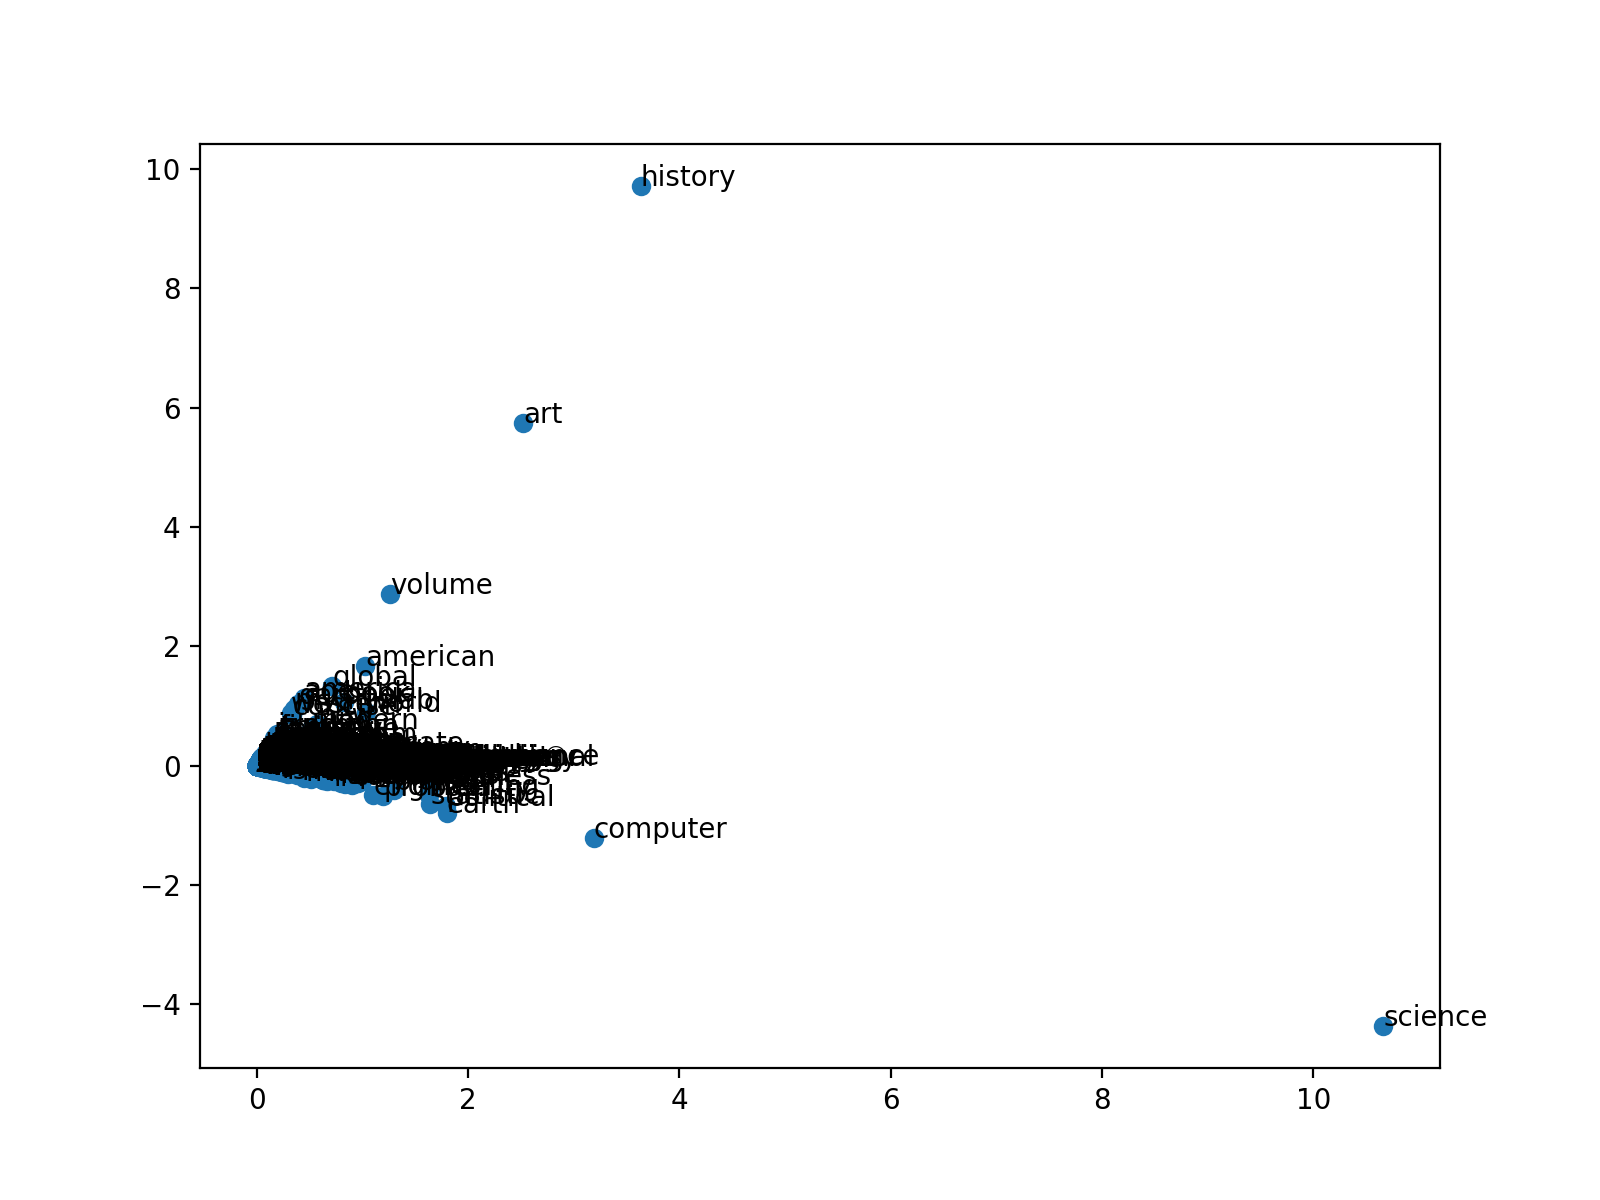

In [44]:
# plot it on a 2D plane
%matplotlib notebook

plt.figure(figsize  = (8,6))
plt.scatter(Z[:,0], Z[:,1])
for i in range(D):
    plt.annotate(s=index_word_map[i], xy=([Z[i,0], Z[i,1]]))
plt.show()